# DSC200 Lecture 8

## An introduction to NumPy (cont.)

## Recap

### Broadcasting

The fact that NumPy operates on an element-wise basis means that in principle arrays must always match one another's shape. However, NumPy will also helpfully "*broadcast*" dimensions when possible.  

Here is an example of broadcasting a scalar to a 1D array:

In [1]:

import numpy as np
print(np.arange(3))
print(np.arange(3) + 5)

[0 1 2]
[5 6 7]


We can also broadcast a 1D array to a 2D array, in this case adding a vector to all rows of a matrix:

In [2]:
 np.ones((3, 3)) + np.arange(3) 

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

We can also broadcast in two directions at a time:

In [3]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a, '+', b, '=\n', a + b)

[[0]
 [1]
 [2]] + [0 1 2] =
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


Pictorially:

![Illustration of broadcasting](./images/fig_broadcast_visual_1.png)

([image source](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html))

What will be the shape of `C` given the following arrays and operation:


```python
A = np.ones((3, 1, 5))
B = np.ones((1, 4, 1))
C = A + B
```

ClassBuzz: `lec8-1`

## Reshape and newaxis

Reshaping arrays is a common task in order to make the best of NumPy's powerful broadcasting.

A useful tip with the **``reshape``** method is that it is possible to provide a ``-1`` length for at most one of the dimensions. This indicates that NumPy should automatically calculate the length of this dimension:

In [4]:
np.arange(6).reshape((1, -1)).shape

(1, 6)

In [5]:
np.arange(6).reshape((2, -1))

array([[0, 1, 2],
       [3, 4, 5]])

Another way to increase the dimensionality of an array is to use the ``newaxis`` keyword:

In [6]:
arr = np.arange(6)
arr2 = np.ones((3,6,5))
(arr[np.newaxis, :, np.newaxis] + arr2).shape

(3, 6, 5)

## Array Properties and Methods (cont.)

For multidimensional arrays it is possible to carry out computations along a single dimension by passing the `axis` parameter:

In [7]:
arr = np.arange(6).reshape((2, 3))
print('For the following array:\n', arr)
print('The sum of elements along the rows is    :', arr.sum(axis=1))
print('The sum of elements along the columns is :', arr.sum(axis=0))

For the following array:
 [[0 1 2]
 [3 4 5]]
The sum of elements along the rows is    : [ 3 12]
The sum of elements along the columns is : [3 5 7]


As you can see in this example, the value of the `axis` parameter is the dimension that will be *consumed* once the operation has been carried out.  This is why to sum along the columns we use `axis=0`.  

This can be easily illustrated with an example that has more dimensions; we create an array with 4 dimensions and shape `(3,4,5,6)` and sum along the axis number 2 (i.e. the *third* axis, since in Python all counts are 0-based).  That consumes the dimension whose length was 5, leaving us with a new array that has shape `(3,4,6)`:

In [8]:
np.zeros((3, 4, 5, 6)).std(axis=(1,2,3)).shape

(3,)

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [9]:
print('Array:\n', arr)
print('Transpose:\n', arr.T)

Array:
 [[0 1 2]
 [3 4 5]]
Transpose:
 [[0 3]
 [1 4]
 [2 5]]


## Generating 2D coordinate arrays

A common task is to generate a pair of arrays that represent the coordinates of our data.

When orthogonal 1d coordinate arrays already exist, NumPy's `meshgrid` function is very useful:

In [10]:
x = np.linspace(0, 9, 3)
y = np.linspace(-8, 4, 3)
x2d, y2d = np.meshgrid(x, y)
print(x2d)
print(y2d)

[[0.  4.5 9. ]
 [0.  4.5 9. ]
 [0.  4.5 9. ]]
[[-8. -8. -8.]
 [-2. -2. -2.]
 [ 4.  4.  4.]]


### Views, not Copies

Note that reshaping (like most NumPy operations), wherever possible, provides a **view** of *the same memory*:

In [11]:
arr = np.arange(8)
arr_view = arr.reshape(2, 4)
arr_copy = arr_view.copy()

What this means is that if one array is modified, the other will also be updated:

In [12]:
# Print the "view" array from reshape.
print('Before\n', arr)

# Update the first element of the original array.
arr_copy[0] = 1000

# Print the "view" array from reshape again,
# noticing the first value has changed.
print('After\n', arr)

Before
 [0 1 2 3 4 5 6 7]
After
 [0 1 2 3 4 5 6 7]


This lack of copying allows for very efficient vectorized operations, but this power should be used carefully - if used badly it can lead to some bugs that are hard to track down.

If in doubt, you can always copy the data to a different block of memory with the **``copy()``** method.

## Element-wise Functions

NumPy ships with a full complement of mathematical functions that work on entire arrays, including logarithms, exponentials, trigonometric and hyperbolic trigonometric functions, etc.  

For example, sampling the sine function at 100 points between $0$ and $2\pi$ is as simple as:

In [13]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
y

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

Or to sample the exponential function between $-5$ and $5$ at intervals of $0.5$:

In [14]:
x = np.arange(-5, 5.5, 0.5)
y = np.exp(x)
y

array([6.73794700e-03, 1.11089965e-02, 1.83156389e-02, 3.01973834e-02,
       4.97870684e-02, 8.20849986e-02, 1.35335283e-01, 2.23130160e-01,
       3.67879441e-01, 6.06530660e-01, 1.00000000e+00, 1.64872127e+00,
       2.71828183e+00, 4.48168907e+00, 7.38905610e+00, 1.21824940e+01,
       2.00855369e+01, 3.31154520e+01, 5.45981500e+01, 9.00171313e+01,
       1.48413159e+02])

## Linear algebra in NumPy

NumPy ships with a basic linear algebra library, and all arrays have a `dot` method whose behavior is that of the scalar dot product when its arguments are vectors (one-dimensional arrays) and the traditional matrix multiplication when one or both of its arguments are two-dimensional arrays:

In [15]:
v1 = np.array([2, 3, 4])
v2 = np.array([1, 0, 1])

print(v1, '.', v2, '=', np.dot(v1, v2))

[2 3 4] . [1 0 1] = 6


For matrix-matrix multiplication, the regular $matrix \times matrix$ rules must be satisfied. For example $A \times A^T$:

In [16]:
A = np.arange(6).reshape(2, 3)
print(A, '\n')
print(np.dot(A, A.T))

[[0 1 2]
 [3 4 5]] 

[[ 5 14]
 [14 50]]


results in a (2, 2) array, yet $A^T \times A$ results in a (3, 3). 

Why is this?:

In [17]:
print(np.dot(A.T, A))

[[ 9 12 15]
 [12 17 22]
 [15 22 29]]


NumPy makes no distinction between row and column vectors and simply verifies that the dimensions match the required rules of matrix multiplication. 

Below is an example of matrix-vector multiplication, and in this case we have a $2 \times 3$ matrix multiplied by a 3-vector, which produces a 2-vector:

In [18]:
print(A, 'x', v1, '=', np.dot(A, v1))

[[0 1 2]
 [3 4 5]] x [2 3 4] = [11 38]


Note: To help with the interpretation of this last result, notice that $0 \times 2 + 1 \times 3 + 2 \times 4 = 11$ and $3 \times 2 + 4 \times 3 + 5 \times 4 = 38$

# An introduction to matplotlib

Matplotlib is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. 

It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (Graphical User Interface) toolkits.

Matplotlib comes with a convenience sub-package called **`pyplot`**. It is a general convention to import this module as **`plt`**:

In [ ]:
#%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 10.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 12.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----------------- ---------------------- 3.1/7.0 MB 15.3 MB/s eta 0:00:01
   ---------------------------------- ----- 6.0/7.0 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 13.1 MB

In [21]:
import matplotlib.pyplot as plt

## The matplotlib figure

At the heart of **every** matplotlib plot is the "Figure" object. The "Figure" object is the top level concept that can be drawn to one of the many output formats, or simply just to screen. Any object that can be drawn in this way is known as an "Artist" in matplotlib.

Let's create our first artist using pyplot, and then show it:

In [22]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the "Axes" artist. The Axes artist represents the "data space" of a typical plot. A rectangular axes (the most common axes, but not the only axes, e.g. polar plots) will have two Axis Artists with tick labels and tick marks.

There is no limit on the number of Axes artists that can exist on a Figure artist. Let's go ahead and create a figure with a single Axes Artist, and show it using pyplot:

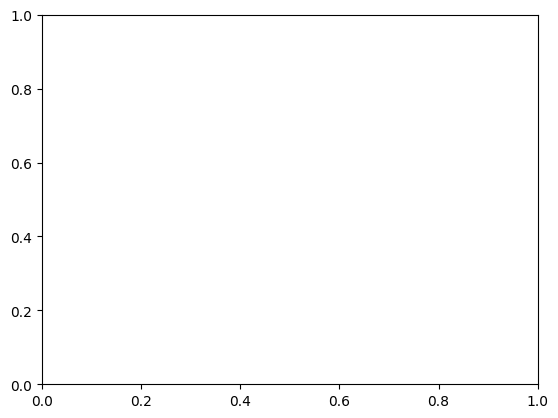

In [23]:
ax = plt.axes()
# plt.show()
ax= plt.gca()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist; we just didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot: **`plt.gcf()`** and **`plt.gca()`**.

## Working with the axes

Most of your time building a graphic in matplotlib will be spent on the Axes artist. Whilst the matplotlib documentation for the Axes artist is very detailed, it is also rather difficult to navigate (though this is an area of ongoing improvement).
As a result, it is often easier to find new plot types by looking at the pyplot module's documentation.

The first and most common Axes method is ``plot``. Go ahead and look at the ``plot`` documentation from the following sources:

 * See cheat sheet!

Plot can be used to draw one or more lines in axes data space:

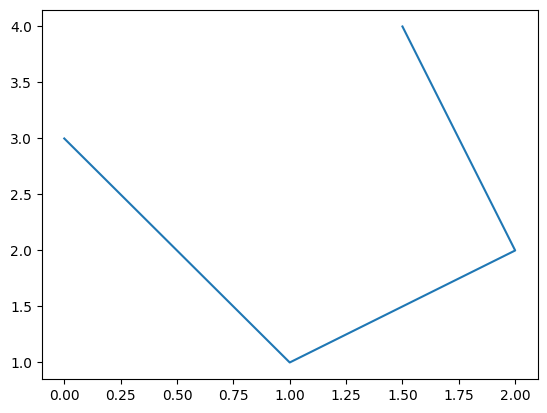

In [24]:
ax = plt.axes()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])

Notice how the axes view limits (``ax.viewLim``) have been updated to include the whole of the line.
Should we want to add some spacing around the edges of our axes we could set the axes margin using the Axes artist's [``margins``](http://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes.margins) method. Alternatively, we could manually set the limits with the Axes artist's [``set_xlim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_xlim) and [``set_ylim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_ylim) methods.

## Multiple axes on the same figure (aka subplot)

Matplotlib makes it relatively easy to add more than one Axes artist to a figure. The ``add_subplot`` method on a Figure artist, which is wrapped by the ``subplot`` function in ``pyplot``, adds an Axes artist in the grid position specified. To compute the position, we must tell matplotlib the number of rows and columns to separate the figure into, and which number the axes to be created is (1 based).

For example, to create axes at the top right and bottom left of a $3 x 2$ notional grid of Axes artists the grid specifications would be ``2, 3, 3`` and ``2, 3, 4`` respectively:

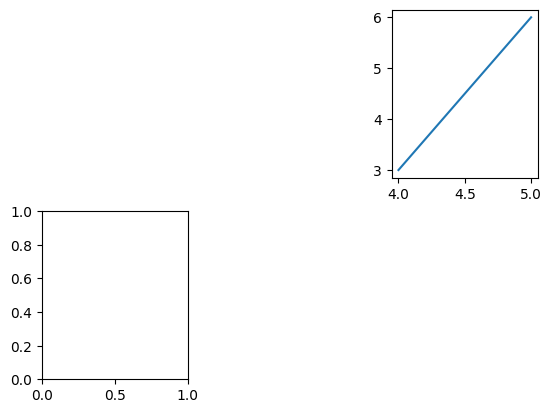

In [25]:
top_right_ax = plt.subplot(2, 3, 3)
bottom_left_ax = plt.subplot(2, 3, 4)
top_right_ax.plot([5, 4], [6, 3] )


**Exercise 3 continued:** Copy the answer from the previous task (plotting $y=sin(x)$ and $y=cos(x)$) and add the appropriate ``plt.subplot`` calls to create a figure with two rows of Axes artists, one showing $y=sin(x)$ and the other showing $y=cos(x)$.

## Further plot types

Matplotlib comes with a huge variety of different plot types. Here is a quick demonstration of the more common ones.

In [26]:
import numpy as np

In [27]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)

In [28]:
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))
data.shape

(30, 60)

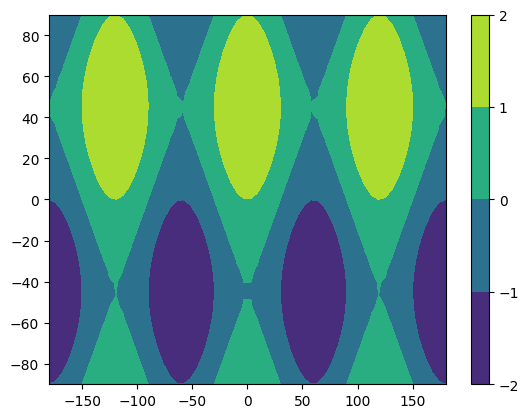

In [29]:
plt.contourf(x, y, data, levels=3)
plt.colorbar()
plt.show()

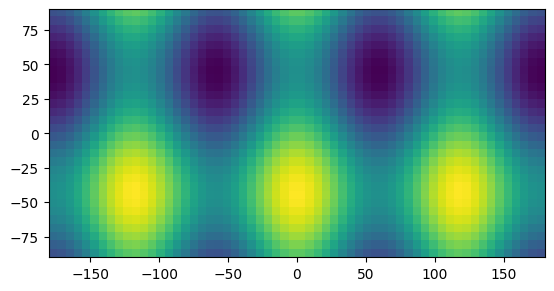

In [30]:
plt.imshow(data, extent=[-180, 180, -90, 90],)
plt.show()

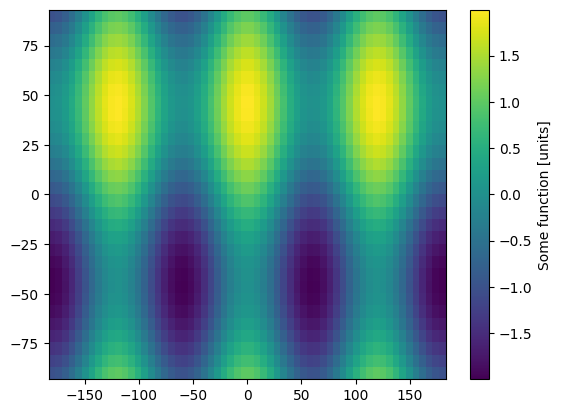

In [31]:
plt.pcolormesh(x, y, data)
plt.colorbar(label='Some function [units]')
plt.show()

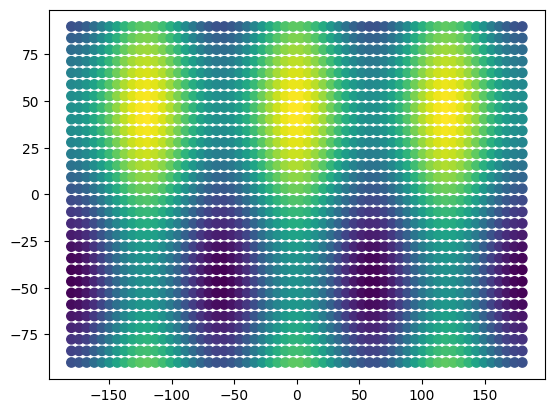

In [32]:
plt.scatter(x2d, y2d, c=data, s=45)
plt.show()

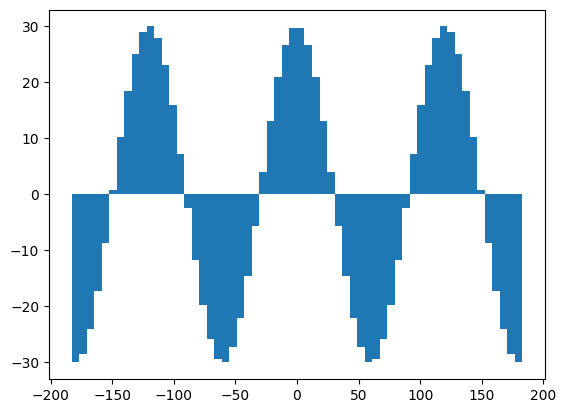

In [33]:
plt.bar(x, data.sum(axis=0), width=np.diff(x)[0])
plt.show() 

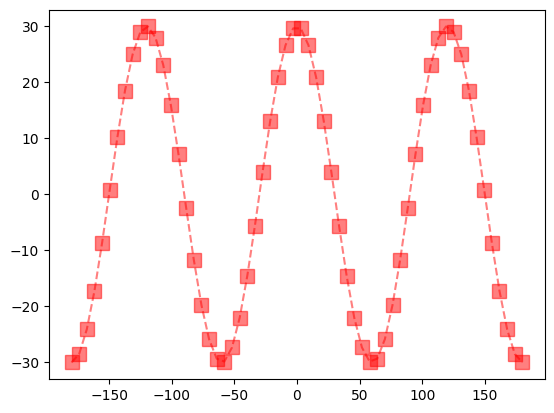

In [34]:
plt.plot(x, data.sum(axis=0), linestyle='--',
         marker='s', markersize=10, color='red', alpha=0.5)
plt.show()